In [1]:
import pandas as pd
df = pd.read_csv('./titanic.csv')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1178, 12)
Unseen Data For Predictions: (131, 12)


In [4]:
from pycaret.classification import *
exp_reg101 = setup(data = data, target = 'Survived', session_id=123)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1178, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8677,0.9294,0.7974,0.8777,0.8338,0.7245,0.7287,0.8410
rf,Random Forest Classifier,0.8629,0.9135,0.8066,0.8598,0.8314,0.7162,0.7184,0.4590
ada,Ada Boost Classifier,0.8616,0.8994,0.7976,0.8627,0.8270,0.7123,0.7156,0.3120
et,Extra Trees Classifier,0.8593,0.9033,0.8007,0.8576,0.8271,0.7087,0.7112,0.5980
lr,Logistic Regression,0.8556,0.9079,0.7772,0.8659,0.8173,0.6987,0.7033,2.6240
dt,Decision Tree Classifier,0.8532,0.8427,0.7775,0.8609,0.8161,0.6945,0.6980,0.0580
ridge,Ridge Classifier,0.8507,0.0000,0.7743,0.8553,0.8116,0.6887,0.6922,0.2090
lightgbm,Light Gradient Boosting Machine,0.8483,0.9181,0.7861,0.8453,0.8137,0.6860,0.6883,0.5210
lda,Linear Discriminant Analysis,0.7599,0.7907,0.6626,0.7450,0.6960,0.4999,0.5066,0.8570
knn,K Neighbors Classifier,0.5885,0.5877,0.4130,0.5093,0.4539,0.1312,0.1333,0.1620


In [6]:
tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8916,0.9464,0.8286,0.9062,0.8657,0.7751,0.7773
1,0.8434,0.9411,0.8286,0.8056,0.8169,0.6801,0.6803
2,0.7952,0.8333,0.7714,0.7500,0.7606,0.5817,0.5819
3,0.8795,0.9274,0.8000,0.9032,0.8485,0.7491,0.7529
4,0.8780,0.9534,0.8529,0.8529,0.8529,0.7488,0.7488
5,0.8537,0.9148,0.7647,0.8667,0.8125,0.6933,0.6969
6,0.9390,0.9724,0.9118,0.9394,0.9254,0.8738,0.8741
7,0.8537,0.9130,0.7941,0.8438,0.8182,0.6959,0.6968
8,0.7927,0.8967,0.7143,0.7812,0.7463,0.5716,0.5732
9,0.8659,0.9337,0.8286,0.8529,0.8406,0.7248,0.7251


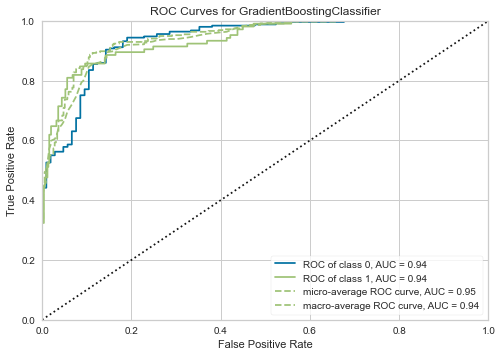

In [7]:
plot_model(tuned)

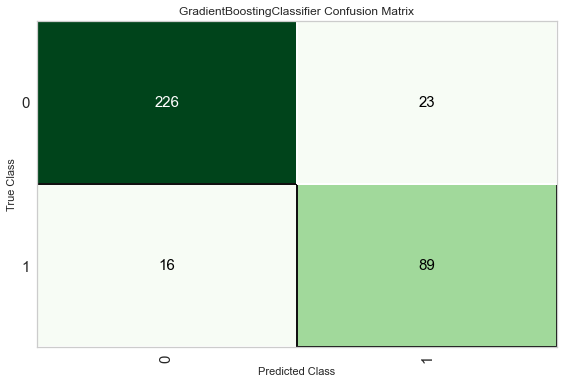

In [8]:
plot_model(tuned, plot = 'confusion_matrix')

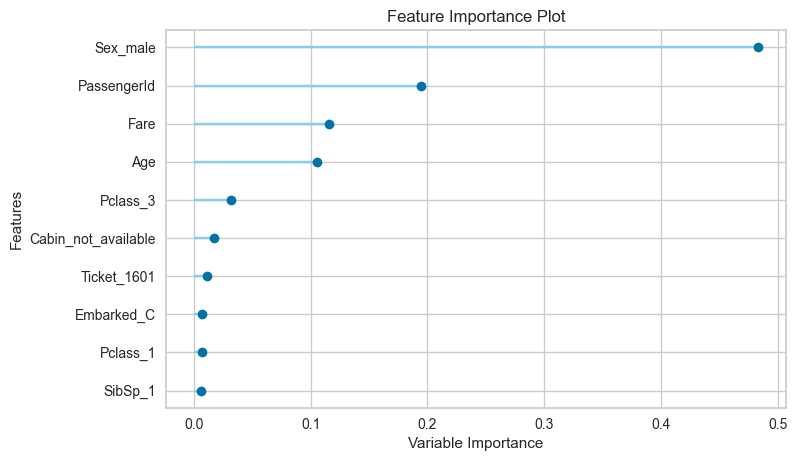

In [9]:
plot_model(tuned, plot = 'feature')

In [10]:
predict_model(tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8898,0.9381,0.8476,0.7946,0.8203,0.7410,0.7418


In [11]:
final = finalize_model(tuned)

In [12]:
predict_model(final);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


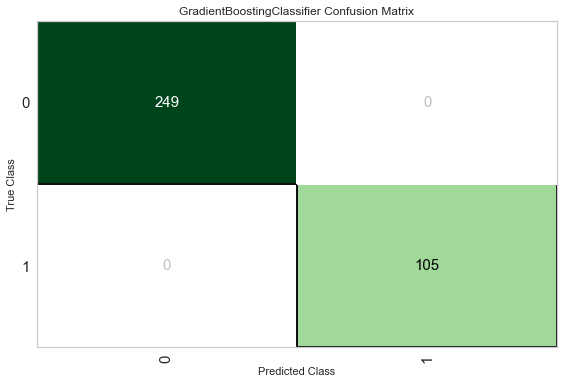

In [13]:
plot_model(final, plot = 'confusion_matrix')

In [14]:
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0.9546
1,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0.6965
2,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,0,0.9605
3,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,0.9005
4,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,1,0.9619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1266,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S,1,0.9925
127,1269,0,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S,0,0.9968
128,1276,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,0,0.9960
129,1284,0,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S,0,0.9964


In [15]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Survived'], unseen_predictions['Label'], metric = 'Accuracy')

0.8168